##### Name: Muhao Chen IIT ID Number: A20456889
##### My git-hub: https://github.com/muhaochen-2021 

## 1. IMDB Movie

### 1.1 Load Data

In [1]:
# reference: https://keras.io/examples/nlp/bidirectional_lstm_imdb/
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,SimpleRNN
from keras.datasets import imdb

In [2]:
# download data
max_features = 20000
maxlen = 70
(train_data, train_labels), (x_test, y_test) = imdb.load_data(num_words = max_features)

In [3]:
print("one review matrix(example):")
print(train_data[0])

one review matrix(example):
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
# split data into train,val and test
x_val = train_data[:5000]
x_train = train_data[5000:]
y_val = train_labels[:5000]
y_train = train_labels[5000:]

# pad/cut the sequences to maxlen
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_val = sequence.pad_sequences(x_val, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)

In [5]:
print("one review matrix(example):")
print(x_val[0])

one review matrix(example):
[   43   530   476    26   400   317    46     7     4 12118  1029    13
   104    88     4   381    15   297    98    32  2071    56    26   141
     6   194  7486    18     4   226    22    21   134   476    26   480
     5   144    30  5535    18    51    36    28   224    92    25   104
     4   226    65    16    38  1334    88    12    16   283     5    16
  4472   113   103    32    15    16  5345    19   178    32]


In [6]:
print("train_data_shape:",x_train.shape)
print("validation_data_shape:",x_val.shape)
print("test_data_shape:",x_test.shape)

train_data_shape: (20000, 70)
validation_data_shape: (5000, 70)
test_data_shape: (25000, 70)


### 1.2 Create RNN Model

In [7]:
# create RNN model
batch_size = 256
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 120,input_length = 70))
model.add(SimpleRNN(120,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# show the structure of model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 70, 120)           2400000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 120)               28920     
                                                                 
 dense (Dense)               (None, 1)                 121       
                                                                 
Total params: 2,429,041
Trainable params: 2,429,041
Non-trainable params: 0
_________________________________________________________________
None


### 1.3 Train RNN Model

In [9]:
# plot the loss and acc, set the callbacks
# reference https://blog.csdn.net/wyx100/article/details/81096192
class Hist_Callbacks(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))

    def loss_plot_loss(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Loss of Model')
        plt.ylim(0,1.5)
        # plot the loss, train
        plt.plot(iters, self.losses[loss_type], 'r', label='train_loss')
        # plot the loss, val
        plt.plot(iters, self.val_loss[loss_type], 'b', label='val_loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('loss')
        plt.legend(loc="upper right")
        plt.show()
        
    def loss_plot_acc(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Accuracy of Model')
        plt.ylim(0, 1)
        # plot the acc, train
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train_acc')
        # plot the acc, val
        plt.plot(iters, self.val_acc[loss_type], 'b', label='val_acc')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc')
        plt.legend(loc="upper right")
        plt.show()

In [10]:
# create history
history = Hist_Callbacks()

# set the parameters
opt = 'adam'
model.compile(loss='binary_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [11]:
# train model
model.fit(x_train, y_train,batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks = [history])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
79/79 [==============================] - ETA: 0s - loss: 0.6996 - accuracy: 0.5196WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000255EACB1288> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

### 1.4 Evaluate RNN Model

In [12]:
# evaluate train and val
score = model.evaluate(x_train, y_train, verbose=0)
print('Test score of train dataset:', score[0])
print('Test accuracy of train dataset:', score[1])
score = model.evaluate(x_val, y_val, verbose=0)
print('Test score of validation dataset:', score[0])
print('Test accuracy of validation dataset:', score[1])

Test score of train dataset: 0.13535472750663757
Test accuracy of train dataset: 0.9512500166893005
Test score of validation dataset: 0.6296229958534241
Test accuracy of validation dataset: 0.7968000173568726


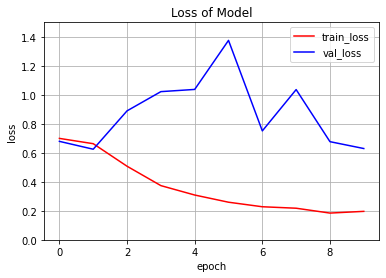

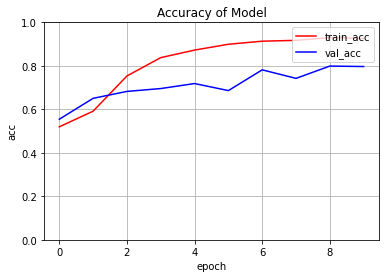

In [13]:
# plot the loss and accuracy of train and val 
loss_type = "epoch"
history.loss_plot_loss(loss_type)
history.loss_plot_acc(loss_type)

In [14]:
# evaluate test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score of test dataset:', score[0])
print('Test accuracy of test dataset:', score[1])

Test score of test dataset: 0.6312285661697388
Test accuracy of test dataset: 0.797760009765625


### 1.5 Create LSTM Model

In [15]:
# create LSTM model
batch_size = 256
model = Sequential()
model.add(Embedding(input_dim = max_features, output_dim = 120,input_length = 70))
model.add(LSTM(120,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [16]:
# show the structure of model
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 70, 120)           2400000   
                                                                 
 lstm (LSTM)                 (None, 120)               115680    
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 2,515,801
Trainable params: 2,515,801
Non-trainable params: 0
_________________________________________________________________
None


### 1.6 Train LSTM Model

In [17]:
# plot the loss and acc, set the callbacks
# reference https://blog.csdn.net/wyx100/article/details/81096192
class Hist_Callbacks(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))

    def loss_plot_loss(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Loss of Model')
        plt.ylim(0,1.5)
        # plot the loss, train
        plt.plot(iters, self.losses[loss_type], 'r', label='train_loss')
        # plot the loss, val
        plt.plot(iters, self.val_loss[loss_type], 'b', label='val_loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('loss')
        plt.legend(loc="upper right")
        plt.show()
        
    def loss_plot_acc(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Accuracy of Model')
        plt.ylim(0, 1)
        # plot the acc, train
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train_acc')
        # plot the acc, val
        plt.plot(iters, self.val_acc[loss_type], 'b', label='val_acc')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc')
        plt.legend(loc="upper right")
        plt.show()

In [18]:
# create history
history = Hist_Callbacks()

# set the parameters
opt = 'adam'
model.compile(loss='binary_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [19]:
# train model
model.fit(x_train, y_train,batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks = [history])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
79/79 [==============================] - ETA: 0s - loss: 0.5105 - accuracy: 0.7344WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000255EAC080D8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) 

### 1.7 Evaluate LSTM Model

In [20]:
# evaluate train and val
score = model.evaluate(x_train, y_train, verbose=0)
print('Test score of train dataset:', score[0])
print('Test accuracy of train dataset:', score[1])
score = model.evaluate(x_val, y_val, verbose=0)
print('Test score of validation dataset:', score[0])
print('Test accuracy of validation dataset:', score[1])

Test score of train dataset: 0.013291641138494015
Test accuracy of train dataset: 0.9974499940872192
Test score of validation dataset: 0.9114207029342651
Test accuracy of validation dataset: 0.796999990940094


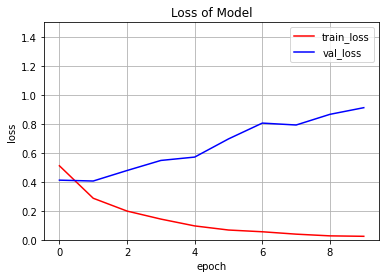

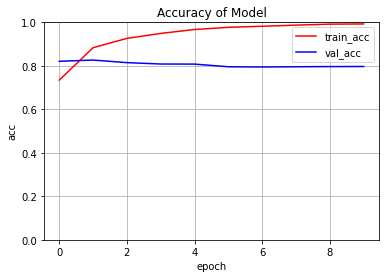

In [21]:
# plot the loss and accuracy of train and val 
loss_type = "epoch"
history.loss_plot_loss(loss_type)
history.loss_plot_acc(loss_type)

In [22]:
# evaluate test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score of test dataset:', score[0])
print('Test accuracy of test dataset:', score[1])

Test score of test dataset: 0.8923676013946533
Test accuracy of test dataset: 0.7958400249481201


## 2. mnist

### 2.1 Load Data

In [23]:
# reference: https://www.tensorflow.org/guide/keras/rnn
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM,SimpleRNN
from keras.datasets import mnist

In [24]:
# download the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# split data into train,val and test
x_val = x_train[:10000]
x_train = x_train[10000:]
y_val = y_train[:10000]
y_train = y_train[10000:]

In [25]:
print("train_data_shape:",x_train.shape)
print("validation_data_shape:",x_val.shape)
print("test_data_shape:",x_test.shape)

train_data_shape: (50000, 28, 28)
validation_data_shape: (10000, 28, 28)
test_data_shape: (10000, 28, 28)


### 2.2 RNN Model

In [26]:
# create RNN model
batch_size = 256
model = Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(SimpleRNN(144,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(72, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [27]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 144)               24912     
                                                                 
 dense_2 (Dense)             (None, 72)                10440     
                                                                 
 dense_3 (Dense)             (None, 10)                730       
                                                                 
Total params: 36,082
Trainable params: 36,082
Non-trainable params: 0
_________________________________________________________________
None


### 2.3 Train RNN Model

In [28]:
# plot the loss and acc, set the callbacks
# reference https://blog.csdn.net/wyx100/article/details/81096192
class Hist_Callbacks(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))

    def loss_plot_loss(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Loss of Model')
        plt.ylim(0,1.5)
        # plot the loss, train
        plt.plot(iters, self.losses[loss_type], 'r', label='train_loss')
        # plot the loss, val
        plt.plot(iters, self.val_loss[loss_type], 'b', label='val_loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('loss')
        plt.legend(loc="upper right")
        plt.show()
        
    def loss_plot_acc(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Accuracy of Model')
        plt.ylim(0, 1)
        # plot the acc, train
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train_acc')
        # plot the acc, val
        plt.plot(iters, self.val_acc[loss_type], 'b', label='val_acc')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc')
        plt.legend(loc="upper right")
        plt.show()

In [29]:
# create history
history = Hist_Callbacks()

# set the parameters
opt = 'adam'
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = opt,
              metrics=['accuracy'])

In [30]:
# train model
model.fit(x_train, y_train,batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks = [history])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


C:\Users\Cappu\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\util\dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


195/196 [============================>.] - ETA: 0s - loss: 1.0964 - accuracy: 0.6145WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000255EB498678> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - 18s 84ms/step - loss: 1.0961 - accuracy: 0.6146 - val_loss: 0.4730 - val_accuracy: 0.8438
Epoch 2/

### 2.4 Evaluate RNN Model

In [31]:
# evaluate train and val
score = model.evaluate(x_train, y_train, verbose=0)
print('Test score of train dataset:', score[0])
print('Test accuracy of train dataset:', score[1])
score = model.evaluate(x_val, y_val, verbose=0)
print('Test score of validation dataset:', score[0])
print('Test accuracy of validation dataset:', score[1])

Test score of train dataset: 0.17598779499530792
Test accuracy of train dataset: 0.9479399919509888
Test score of validation dataset: 0.1921755075454712
Test accuracy of validation dataset: 0.9492999911308289


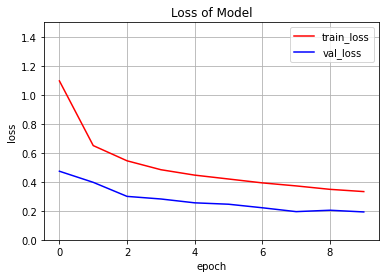

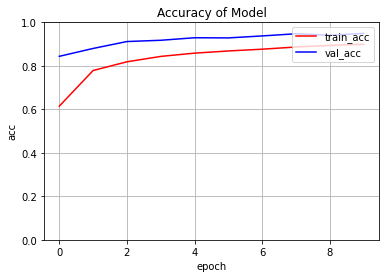

In [32]:
# plot the loss and accuracy of train and val 
loss_type = "epoch"
history.loss_plot_loss(loss_type)
history.loss_plot_acc(loss_type)

In [33]:
# evaluate test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score of test dataset:', score[0])
print('Test accuracy of test dataset:', score[1])

Test score of test dataset: 0.1669679880142212
Test accuracy of test dataset: 0.9527000188827515


### 2.5 LSTM Model

In [34]:
# create RNN model
batch_size = 256
model = Sequential()
model.add(keras.Input(shape=(28,28)))
model.add(LSTM(144,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(72, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [35]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 144)               99648     
                                                                 
 dense_4 (Dense)             (None, 72)                10440     
                                                                 
 dense_5 (Dense)             (None, 10)                730       
                                                                 
Total params: 110,818
Trainable params: 110,818
Non-trainable params: 0
_________________________________________________________________
None


### 2.6 Train LSTM Model

In [36]:
# plot the loss and acc, set the callbacks
# reference https://blog.csdn.net/wyx100/article/details/81096192
class Hist_Callbacks(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))

    def loss_plot_loss(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Loss of Model')
        plt.ylim(0,1.5)
        # plot the loss, train
        plt.plot(iters, self.losses[loss_type], 'r', label='train_loss')
        # plot the loss, val
        plt.plot(iters, self.val_loss[loss_type], 'b', label='val_loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('loss')
        plt.legend(loc="upper right")
        plt.show()
        
    def loss_plot_acc(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Accuracy of Model')
        plt.ylim(0, 1)
        # plot the acc, train
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train_acc')
        # plot the acc, val
        plt.plot(iters, self.val_acc[loss_type], 'b', label='val_acc')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc')
        plt.legend(loc="upper right")
        plt.show()

In [37]:
# create history
history = Hist_Callbacks()

# set the parameters
opt = 'adam'
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = opt,
              metrics=['accuracy'])

In [38]:
# train model
model.fit(x_train, y_train,batch_size=batch_size,
                    epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks = [history])

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
196/196 [==============================] - ETA: 0s - loss: 0.8231 - accuracy: 0.7225WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000255960F44C8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

### 2.7 Evaluate LSTM Model

In [39]:
# evaluate train and val
score = model.evaluate(x_train, y_train, verbose=0)
print('Test score of train dataset:', score[0])
print('Test accuracy of train dataset:', score[1])
score = model.evaluate(x_val, y_val, verbose=0)
print('Test score of validation dataset:', score[0])
print('Test accuracy of validation dataset:', score[1])

Test score of train dataset: 0.0389813631772995
Test accuracy of train dataset: 0.987779974937439
Test score of validation dataset: 0.05976995825767517
Test accuracy of validation dataset: 0.9825999736785889


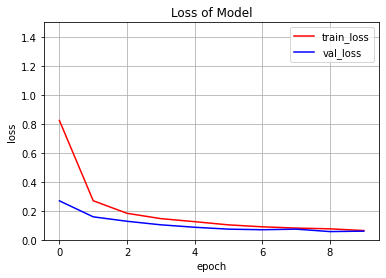

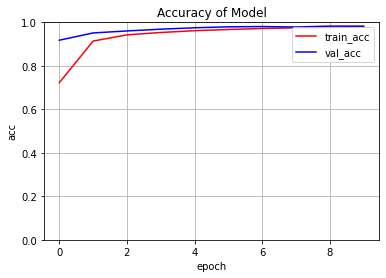

In [40]:
# plot the loss and accuracy of train and val 
loss_type = "epoch"
history.loss_plot_loss(loss_type)
history.loss_plot_acc(loss_type)

In [41]:
# evaluate test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score of test dataset:', score[0])
print('Test accuracy of test dataset:', score[1])

Test score of test dataset: 0.05602298676967621
Test accuracy of test dataset: 0.9807999730110168
